In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

In [2]:
SportsTeams = {'Mens Volleyball Team': ['https://ccnyathletics.com/sports/mens-volleyball/roster', 'https://lehmanathletics.com/sports/mens-volleyball/roster', 'https://www.brooklyncollegeathletics.com/sports/mens-volleyball/roster', 'https://johnjayathletics.com/sports/mens-volleyball/roster', 'https://athletics.baruch.cuny.edu/sports/mens-volleyball/roster', 'https://mecathletics.com/sports/mens-volleyball/roster', 'https://www.huntercollegeathletics.com/sports/mens-volleyball/roster', 'https://yorkathletics.com/sports/mens-volleyball/roster', 'https://ballstatesports.com/sports/mens-volleyball/roster'],
                'Womens Volleyball Team': ['https://bmccathletics.com/sports/womens-volleyball/roster', 'https://yorkathletics.com/sports/womens-volleyball/roster', 'https://hostosathletics.com/sports/womens-volleyball/roster', 'https://bronxbroncos.com/sports/womens-volleyball/roster/2021', 'https://queensknights.com/sports/womens-volleyball/roster', 'https://augustajags.com/sports/wvball/roster', 'https://flaglerathletics.com/sports/womens-volleyball/roster', 'https://pacersports.com/sports/womens-volleyball/roster', 'https://www.golhu.com/sports/womens-volleyball/roster'],
                'Mens Swim Team': ['https://csidolphins.com/sports/mens-swimming-and-diving/roster', 'https://yorkathletics.com/sports/mens-swimming-and-diving/roster', 'https://athletics.baruch.cuny.edu/sports/mens-swimming-and-diving/roster', 'https://www.brooklyncollegeathletics.com/sports/mens-swimming-and-diving/roster', 'https://lindenwoodlions.com/sports/mens-swimming-and-diving/roster', 'https://mckbearcats.com/sports/mens-swimming-and-diving/roster', 'https://ramapoathletics.com/sports/mens-swimming-and-diving/roster', 'https://oneontaathletics.com/sports/mens-swimming-and-diving/roster', 'https://bubearcats.com/sports/mens-swimming-and-diving/roster/2021-22', 'https://albrightathletics.com/sports/mens-swimming-and-diving/roster'],
                'Womens Swim Team': ['https://csidolphins.com/sports/womens-swimming-and-diving/roster', 'https://queensknights.com/sports/womens-swimming-and-diving/roster', 'https://yorkathletics.com/sports/womens-swimming-and-diving/roster', 'https://athletics.baruch.cuny.edu/sports/womens-swimming-and-diving/roster/2021-22?path=wswim', 'https://www.brooklyncollegeathletics.com/sports/womens-swimming-and-diving/roster', 'https://lindenwoodlions.com/sports/womens-swimming-and-diving/roster', 'https://mckbearcats.com/sports/womens-swimming-and-diving/roster', 'https://ramapoathletics.com/sports/womens-swimming-and-diving/roster', 'https://keanathletics.com/sports/womens-swimming-and-diving/roster', 'https://oneontaathletics.com/sports/womens-swimming-and-diving/roster']}

In [13]:
for key, value in SportsTeams.items():
    print(f'{key}: {len(value)}')

Mens Volleyball Team: 9
Womens Volleyball Team: 9
Mens Swim Team: 10
Womens Swim Team: 10


In [14]:
def project_scrapping(teamName, teamUrl):
    collegeHeightList = []
    collegeNameList = []
    totalHeight = 0
    
    for collegeUrl in teamUrl:     
        collegePage = requests.get(collegeUrl)
        collegeSoup = BeautifulSoup(collegePage.content, 'html.parser')
        collegeHeightTags = collegeSoup.find_all('td', class_ = 'height')
        collegeNameTags = collegeSoup.find_all('td', class_ = 'sidearm-table-player-name')
        
        for collegeName in collegeNameTags:
            collegeNameList.append(collegeName.get_text().strip())
            
        for collegeHeight in collegeHeightTags:
            collegeHeight = collegeHeight.get_text()
            if collegeHeight == '-':
                collegeHeight = np.nan
                collegeHeightList.append(collegeHeight)
                
            else:
                collegeHeight = collegeHeight.split('-')
                heightInches = int(collegeHeight[0]) * 12 + int(collegeHeight[1])
                totalHeight += heightInches
                collegeHeightList.append(heightInches)
   
    filename = teamName + '.csv'
    df = pd.DataFrame()
    df['Name'] = collegeNameList
    df['Height'] = collegeHeightList
    df.to_csv(filename, index = False)
    return df              

In [15]:
mens_volleyball_team_df = project_scrapping('mens volleyball', SportsTeams['Mens Volleyball Team'])
mens_swim_team_df = project_scrapping('mens swim', SportsTeams['Mens Swim Team'])
womens_volleyball_team_df = project_scrapping('womens volleyball', SportsTeams['Womens Volleyball Team'])
womens_swim_team_df = project_scrapping('womens swim', SportsTeams['Womens Swim Team'])

In [16]:
mens_volleyball_team_df

,Name,Height
0,Jeffrey Celis,69
1,Reng Chen,69
2,Edwin Fierros Gaytan,68
3,Fred De La Cuadra,70
4,Utpal Chand,69
...,...,...
105,Brandon Shepherd,74
106,Kevin Doran,79
107,Sammy Adkisson,69
108,Lucas Biondi,78


In [17]:
womens_swim_team_df

,Name,Height
0,Kathleen Bridgman,65.0
1,Angye Galan,NaN
2,Jessica Johnson,68.0
3,Macy Jones-Busch,NaN
4,Bridget Mulvey,67.0
...,...,...
140,Paige Splendido,65.0
141,Emma Stephenson,67.0
142,Callie Stinson,64.0
143,Jessie Triller,62.0


In [21]:
mens_volleyball_team_df.describe()

,Height
count,110.000000
mean,72.054545
std,3.951161
min,63.000000
25%,69.000000
50%,72.000000
75%,75.000000
max,81.000000


In [22]:
womens_swim_team_df.describe()

,Height
count,145.000000
mean,65.700000
std,2.773135
min,59.000000
25%,64.000000
50%,66.000000
75%,68.000000
max,72.000000


In [18]:
mens_volleyball_team_avg = mens_volleyball_team_df['Height'].mean()

mens_swim_team_avg = mens_swim_team_df['Height'].mean()
mens_swim_team_df['Height'] = mens_swim_team_df['Height'].fillna(value = mens_swim_team_avg)

womens_volleyball_team_avg = womens_volleyball_team_df['Height'].mean()

womens_swim_team_avg = womens_swim_team_df['Height'].mean()
womens_swim_team_df['Height'] = womens_swim_team_df['Height'].fillna(value= womens_swim_team_avg)

average_heights = pd.DataFrame({'Team type': ['Mens Volleyball Team', 'Mens Swim Team', 'Womens Volleyball Team', 'Womens Swim Team'],
                               'Avg height': [mens_volleyball_team_avg, mens_swim_team_avg, womens_volleyball_team_avg, womens_swim_team_avg]})

In [19]:
average_heights

,Team type,Avg height
0,Mens Volleyball Team,72.054545
1,Mens Swim Team,71.597633
2,Womens Volleyball Team,67.157895
3,Womens Swim Team,65.700000


In [23]:
df_dictionary = {'MensVolleyballTeam': mens_volleyball_team_df, 'MensSwimTeam': mens_swim_team_df,
                 'WomensVolleyballTeam': womens_volleyball_team_df, 'WomensSwimTeam': womens_swim_team_df}

def short_tall(name_team, df_team):
    unique_heights = list(df_team['Height'].unique())
    unique_heights.sort(reverse = False)
    fifth_shortest = unique_heights[4]
    fifth_tallest = unique_heights[-5]
    
    tallest_filter = df_team['Height'] >= fifth_tallest
    shortest_filter = df_team['Height'] <= fifth_shortest
    
    tallPlayers = df_team[tallest_filter]
    tallPlayers = tallPlayers.sort_values(by = 'Height', ascending = True)
    shortPlayers = df_team[shortest_filter]
    shortPlayers = shortPlayers.sort_values(by = 'Height', ascending = True)
    
    print(f'{name_team}\nShortest Players\n{shortPlayers}\n\n')
    print(f'{name_team}\nTallest Players\n{tallPlayers}\n\n')

for Team, DF in df_dictionary.items():
    short_tall(Team, DF)

MensVolleyballTeam
Shortest Players
                    Name  Height
11            Juan Lemus      63
35         Bryce Glasper      64
69           Andrew Reza      66
67             Bryan Eng      66
23          Darren Roach      66
34        Evan Wandersee      67
63            Eliah Tull      67
61      Enmanuel  Jaquez      67
45            Naoki Tani      67
39      Carlos Llivicura      67
91           Xander Pink      67
21       Christian Agudo      67
17           Jimmy Evans      67
15           Isaac Reyes      67
13       Miguel Gonzalez      67
10         Ray Rodriguez      67
81          Shawn Nemoto      67
14     Kemp Brian Dullin      68
71            Raymond Yu      68
2   Edwin Fierros Gaytan      68


MensVolleyballTeam
Tallest Players
                      Name  Height
41             Jack Nugent      77
99         Felix Egharevba      77
9           Xhulio Myftari      78
43   Kyle Barriffe-Johnson      78
90          Kaleb  Jenness      78
95         Trevor Philli

<AxesSubplot:title={'center':'Bar graph of the avg heights of volleyball and swim teams for men and women'}, xlabel='Team type'>

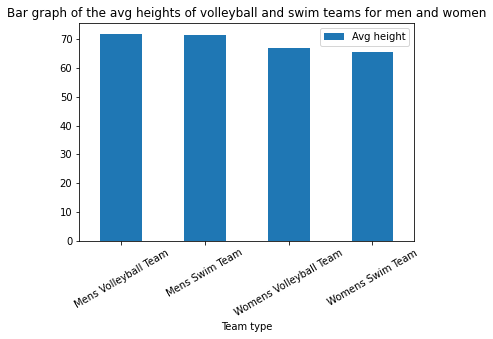

In [24]:
average_heights.plot.bar(x = 'Team type', y = 'Avg height', rot = 30, title = 'Bar graph of the avg heights of volleyball and swim teams for men and women')